# Twitter Sentiment Analysis

## Here's the procedure/steps to be followed:

    1] Understand the Problem Statement
    
    2] Tweets Preprocessing and Cleaning
        Data Inspection
        Data Cleaning
        
    3] EDA, Story Generation and Visualization from Tweets
    
    4] Extracting Features from Cleaned Tweets
        Bag-of-Words
        TF-IDF
        Word Embeddings
        
    5] Model Building: Sentiment Analysis
        Logistic Regression
        Support Vector Machine
        RandomForest
        XGBoost
        
    6] Model Fine-tuning of model giving best score from above step
    
    7] Summary



### 1] Understanding the Problem Statement
    The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

    Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist

#### Fisrt Things First 

In [13]:
# Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

# for nlp 
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb

# for Evalution
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

#### Importing Dataset 

In [14]:
data = pd.read_csv("train.csv")

print("Train size :", data.shape)

Train size : (31962, 3)


We have 3192 tweets

Text is a highly unstructured form of data, various types of noise are present in it and the data 
is not readily analyzable without any pre-processing. The entire process of cleaning and 
standardization of text, making it noise-free and ready for analysis is known as text preprocessing.
 We will divide it into 2 parts:

1. Data Inspection
2. Data Cleaning


## 2] Tweets preprocessing and cleaning 

### 2.1] Data Inspection 

In [15]:
# Getting column names
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [16]:
# Taking a look at top 10 tweets
data.tweet.head(10)

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object

In [18]:
# Taking a look at racist tweets
data[data.label == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [19]:
# Taking a look at non racist tweets
data[data.label == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [20]:
# checking dimensions of the train and test dataset.
print(data.shape, data.shape)

(31962, 3) (31962, 3)


In [22]:
# checking total of racist and non racist tweets
data["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

We have 29720(~7%) non racist tweets and 2242(~93%). Its clearly and imbalanced dataset

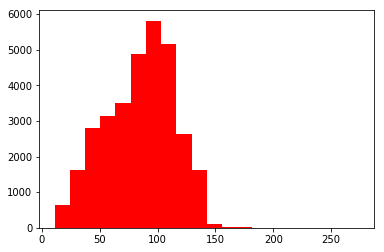

In [24]:
# checking the distribution of length of the tweets, in terms of chararacter
length_train = data.tweet.apply(lambda x : len(x)) # train.tweet.str.len()

# Plotting histogram using length
plt.hist(length_train, bins=20, color="red")
plt.show()

In [25]:
# Checking max and min character length tweet in train
print(max(length_train), min(length_train))

274 11


### Data Cleaning 

In [26]:
# contractions set for expanding contractions
contraction = { 
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"i'm":"i am",
"i've": "i have",
"i'd": "i had",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [27]:
# Saving stopwords
stopwords = set(STOPWORDS)
stopwords.remove('no') #removing negation from tweets as they contribute a lot
stopwords.remove('nor')
stopwords.remove('not')


In [28]:
# function for expanding contractions
def contractions(tweet):
    text = tweet.lower()
    words = []
    for word in text.split():
        if word in contraction:
            words.append(contraction.get(word))
        else:
            words.append(word)
    
    return " ".join(words)

#function for removing small words
def remove_small(tweet):
    
    words = []
    for word in tweet.split():
        if word in ["no","not","nor","never"]:
            words.append("not")
        elif len(word) > 2:
            words.append(word)
        
    return " ".join(words)


# Writing function for cleaning tweet
def clean(tweets):
    pre_processed_tweets = []
    
    for text in tweets:
        sentence = re.sub("@user", "", text) # removing user handles
        sentence = re.sub("[^a-zA-Z\'\s]","", sentence) # removing non characters
        sentence = re.sub("amp", "", sentence)  #removing word amp
        sentence = re.sub("bihday", "birthday", sentence)  #found bitrhday is missspelled a lot of times
        sentence = contractions(sentence) #expanding contractions
        sentence = re.sub(r"\'", "", sentence)
        sentence = " ".join(word for word in sentence.split() if word not in stopwords)
        sentence = remove_small(sentence) # removing short words
        stemmer = WordNetLemmatizer() # Stemming
        sentence = " ".join(stemmer.lemmatize(word, pos="v") for word in sentence.split())
        pre_processed_tweets.append(sentence.lower())
    return pre_processed_tweets


##### Cleaning Tweets 

In [29]:
data["cleaned_tweets"] = clean(data.tweet)

#####  Saving cleaned data for future use

In [30]:
data.to_csv("cleaned_tweets", index=False)

## 3] EDA and Visualiztion of tweets

##### Using WordCloud to visualize the cleaned data 

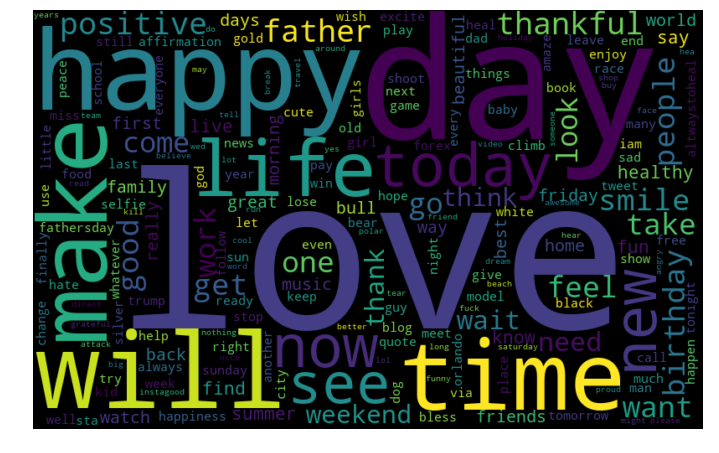

In [31]:
# For whole data
all_words = " ".join(text for text in data.cleaned_tweets)
word_frequncy = pd.Series(all_words.split()).value_counts().drop("not")
plt.figure(figsize=(12,10))    
wcd = WordCloud(width=800, height=500, background_color="black", random_state=21).generate_from_frequencies(word_frequncy)
plt.imshow(wcd, interpolation="bilinear")
plt.axis("off")
plt.show()

Well we can see the most dominating words in whole dataset's are like love, happy, time life.
But its not giving us the most words used in hatred comments and non hatred comments explicitly

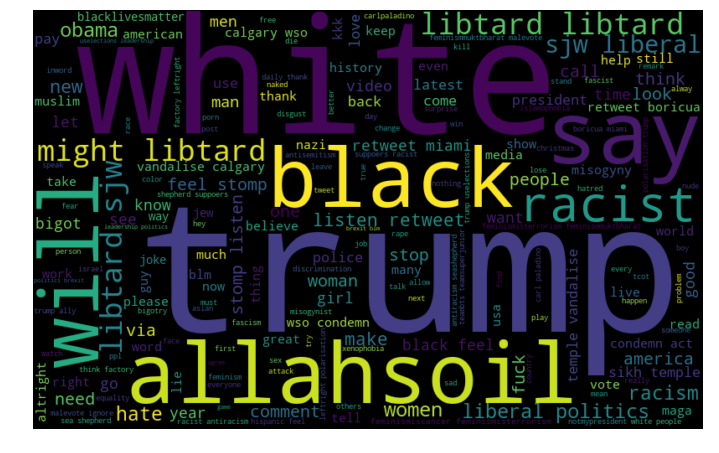

In [32]:
# For racist tweets
racist_tweets = data.cleaned_tweets[data.label == 1]
racist_tweets_all_words = " ".join(text for text in racist_tweets)
racist_word_frequncy = pd.Series(racist_tweets_all_words.split()).value_counts().drop("not")
plt.figure(figsize=(12,10))    
wcd = WordCloud(width=800, height=500, background_color="black", random_state=21).generate(racist_tweets_all_words)
plt.imshow(wcd, interpolation="bilinear")
plt.axis("off")
plt.show()

This diagram makes sense as the most words used in rasict tweets are black, trump, white etc

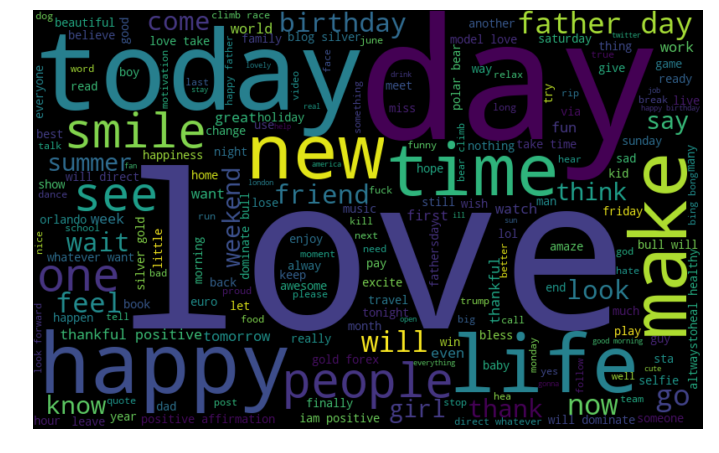

In [33]:
# For non racist tweets
non_racist_tweets = data.cleaned_tweets[data.label == 0]
non_racist_tweets_all_words = " ".join(text for text in non_racist_tweets)
non_racist_word_frequncy = pd.Series(non_racist_tweets_all_words.split()).value_counts().drop("not")
plt.figure(figsize=(12,10))    
wcd = WordCloud(width=800, height=500, background_color="black", random_state=21).generate(non_racist_tweets_all_words)
plt.imshow(wcd, interpolation="bilinear")
plt.axis("off")
plt.show()

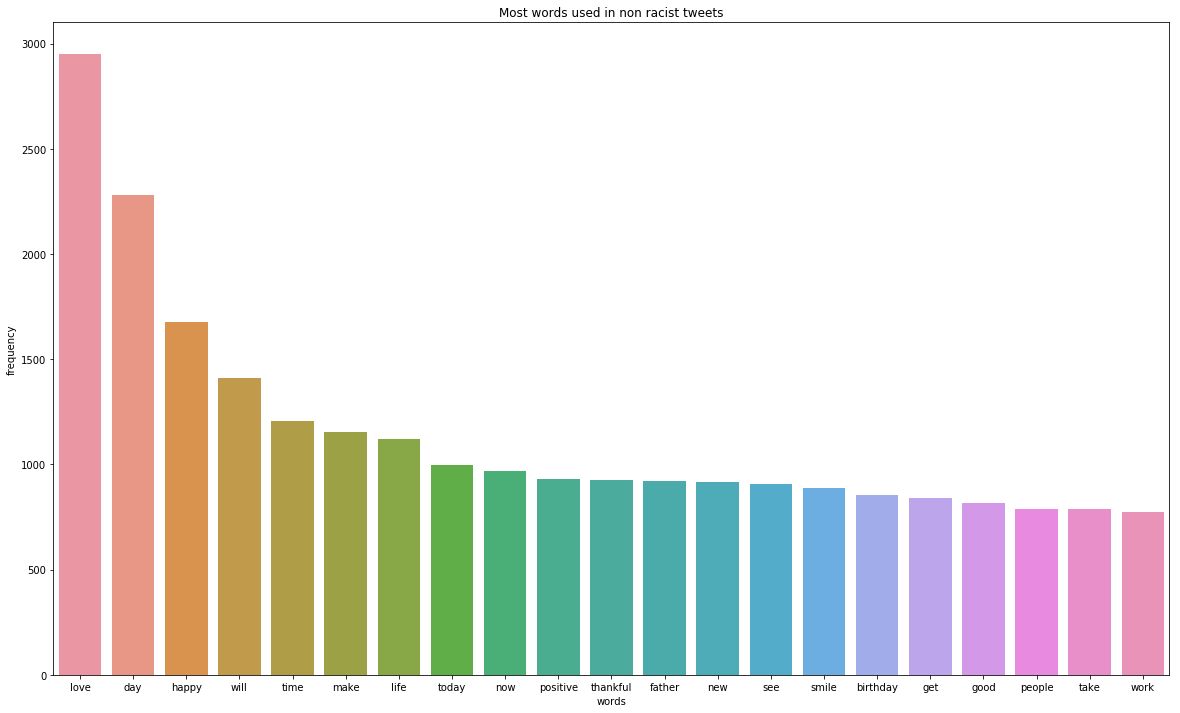

In [34]:
#Bar plot for non racist comments
plt.close()
plt.figure(figsize=(20,12))
sns.barplot(non_racist_word_frequncy.keys()[0:21],[word for word in dict(zip(non_racist_word_frequncy.keys(),non_racist_word_frequncy)).values()][0:21])
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Most words used in non racist tweets")
plt.show()

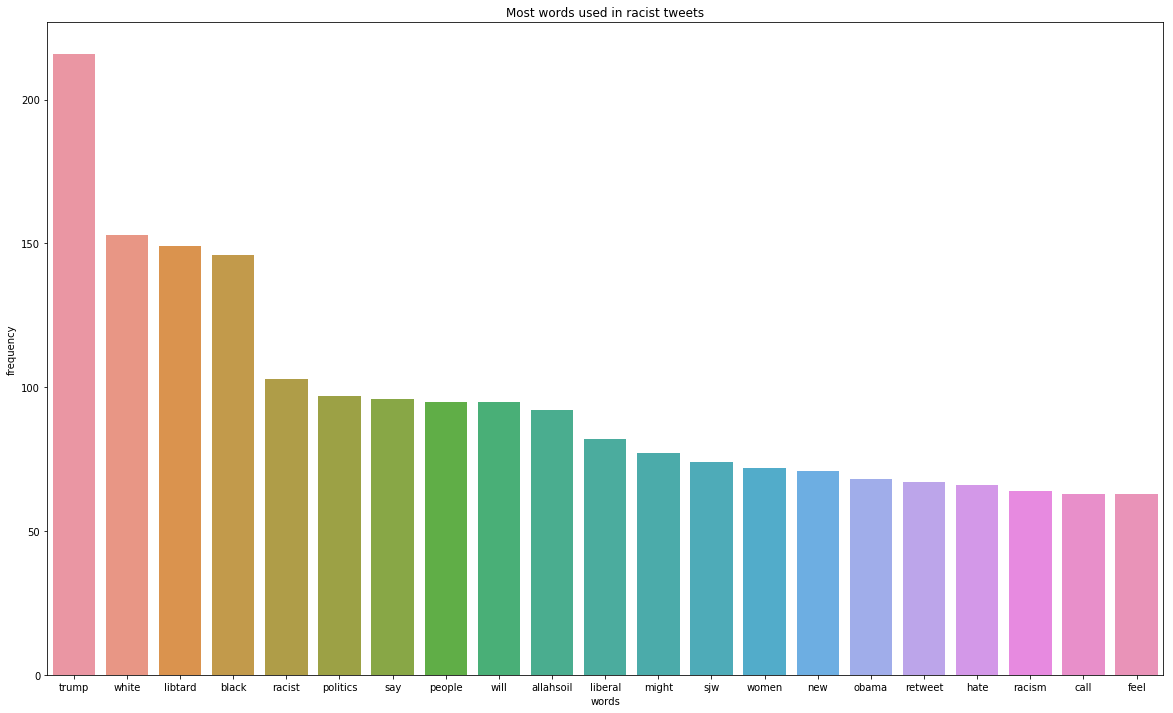

In [35]:
#Bar plot for most hateful/racist comments
top_words = [word for word in dict(zip(racist_word_frequncy.keys(),racist_word_frequncy)).keys()][0:21] # getiing top 20 words 
top_words_freq =[word for word in dict(zip(racist_word_frequncy.keys(),racist_word_frequncy)).values()][0:21]  # getting frequency of top 20 words.
plt.figure(figsize=(20,12))
sns.barplot(x=top_words,y=top_words_freq)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Most words used in racist tweets")
plt.show()

## 4] Extracting Features from Cleaned Tweets

##### BOW

In [36]:
## Featarization using BOW
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(min_df=10, max_features=1000)
bow = bow_vectorizer.fit_transform(data.cleaned_tweets)
bow.shape

(31962, 1000)

#####  TF-IDF

In [37]:
## Featarization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(data.cleaned_tweets)
tfidf.shape

(31962, 1000)

##### Word2Vec 

In [38]:
## Word2Vec
from gensim.models import Word2Vec
tokenized_words = data.cleaned_tweets.apply(lambda x : x.split())
"""Step 1 : Instantiating model"""
w2v_model = Word2Vec(min_count=10,window=2,size=300,sample=6e-5,alpha=0.03,min_alpha=0.0007,negative=20)
"""STep 2 : Building Vocabulary"""
w2v_model.build_vocab(tokenized_words)
""" Trainig the model """
w2v_model.train(tokenized_words, total_examples=w2v_model.corpus_count, epochs=30)

C:\Users\suraj\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


(2367521, 7104360)

In [41]:
#Checking Similar words"
print(w2v_model.wv.most_similar(positive=["racist"]))
print()
print(w2v_model.wv.most_similar(positive=["love"], topn=6))

[('comment', 0.9280990362167358), ('antiracism', 0.8964682817459106), ('suppoers', 0.8956027030944824), ('seashepherd', 0.8856093287467957), ('trump', 0.8692950010299683), ('ignorance', 0.862962007522583), ('bernie', 0.8622851371765137), ('remark', 0.8586152791976929), ('nominee', 0.8574612736701965), ('ally', 0.8519882559776306)]

[('friends', 0.8375709056854248), ('feliz', 0.8201280832290649), ('moments', 0.8137488961219788), ('kitty', 0.8034681677818298), ('precious', 0.8005726933479309), ('smile', 0.8000802993774414)]


In [42]:
#Checking Similarity between words
print(w2v_model.wv.similarity("love", "black"))
print()
print(w2v_model.wv.similarity("white", "racist"))

0.17870962265161322

0.5910990502601807


###### Well we have created the vectors for each word now its time to create vector for each tweets/sentence

In [44]:
#creating function for creating sentence vector
def tweet_vec():
    tweet_vector = []
    """ LOOP for each tweet"""
    for tweet in tokenized_words:
        vector = np.zeros((300)).reshape(1,300)
        count = 0
        """ LOOP for each word in tweet"""
        for word in tweet:
            if word in w2v_model.wv.vocab:
                count +=1
                vector += w2v_model[word]
        if count:
            vector /=count
        tweet_vector.append(vector)
    return tweet_vector

In [45]:
# Genearting list containing vectors
w2v_vectors =tweet_vec()

## 5] Model Building: Sentiment Analysis

### 1) Logistic Regression 

### a. LR using Bag of Words Features  

In [46]:
# Splitting my data into train and validation data

X_train, X_test, y_train, y_test = train_test_split(bow, data["label"], test_size=0.3, random_state=0)

In [51]:
#Doing grid search for hyper-parameter tuning and for getting  best model

classifier = LogisticRegression()

parameters = {"C":(0.01,0.1,1,3,4,5,10,11,12,13,15,17,18,20)}

clf = GridSearchCV(classifier, param_grid=parameters, cv=10, scoring= make_scorer(f1_score))

clf.fit(X_train,y_train)

#Storing f1 scores
fscore_train = clf.cv_results_.get("mean_train_score")
fscore_test =clf.cv_results_.get("mean_test_score")
print("Train Score ",fscore_train)
print()
print("Test Score :",fscore_test)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Score  [0.05272362 0.36488608 0.52900836 0.56827967 0.57960738 0.58735337
 0.60620739 0.60748546 0.60904039 0.61077473 0.61172311 0.61374302
 0.61427985 0.61578176]

Test Score : [0.03629818 0.34368462 0.47151513 0.4890617  0.4911396  0.4948402
 0.50333717 0.50506523 0.50542846 0.50655049 0.50586318 0.50660232
 0.50604994 0.50711699]


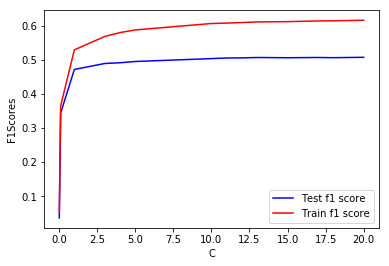

In [52]:
#Plotting C vs f1 scores
plt.plot(list(parameters.get("C")),fscore_test, color = "blue", label="Test f1 score")
plt.plot(list(parameters.get("C")),fscore_train,color = "red", label="Train f1 score")
plt.xlabel("C")
plt.ylabel("F1Scores")
plt.legend()
plt.show()

From the plot we can conclude that after 4.5 the performance gets stagnant hence can choose 4.5 as C

In [55]:
#Instantiting the optimal logistic Classifier
optimal_regressor = LogisticRegression(C=4.5)
optimal_regressor.fit(X_train, y_train)
# Getiing f1 scores
probablity = optimal_regressor.predict_proba(X_test)
y_pred = [1 if x>=0.3 else 0 for x in probablity[:,1]]

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)
lr_bow_score = f1Score

54.530874097834804


<h3 style="color:red">Score using logistic regression with bow is ~ 54.5% </h3>

### b. LR using Tf-Idf Features  

In [57]:
# Splitting my data into train and validation data

X_train, X_test, y_train, y_test = train_test_split(tfidf, data["label"], test_size=0.3, random_state=0)

In [58]:
#Doing grid search for hyper-parameter tuning and for getting  best model

classifier = LogisticRegression()

parameters = {"C":(0.01,0.1,1,3,4,5,10,11,12,13,15,17,18,20)}

clf = GridSearchCV(classifier, param_grid=parameters, cv=10, scoring= make_scorer(f1_score))

clf.fit(X_train,y_train)

#Storing f1 scores
fscore_train = clf.cv_results_.get("mean_train_score")
fscore_test =clf.cv_results_.get("mean_test_score")
print("Train Score ",fscore_train)
print()
print("Test Score :",fscore_test)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Score  [0.         0.10455297 0.48999561 0.5591365  0.56982526 0.57679517
 0.59655565 0.5982614  0.60128709 0.60300302 0.60592942 0.60834607
 0.60940151 0.61149396]

Test Score : [0.         0.09713894 0.46032761 0.51394008 0.52017361 0.52104648
 0.5274525  0.52588787 0.52703231 0.52760436 0.52942522 0.53050094
 0.52918624 0.53072755]


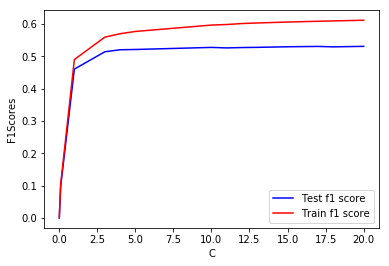

In [59]:
#Plotting C vs f1 scores
plt.plot(list(parameters.get("C")),fscore_test, color = "blue", label="Test f1 score")
plt.plot(list(parameters.get("C")),fscore_train,color = "red", label="Train f1 score")
plt.xlabel("C")
plt.ylabel("F1Scores")
plt.legend()
plt.show()

From the plot we can conclude that after 4.5 the performance is stagnated hence can choose 4.5 as C

In [60]:
#Instantiting the optimal logistic Classifier
optimal_regressor = LogisticRegression(C=4.5)
optimal_regressor.fit(X_train, y_train)
# Getiing f1 scores
probablity = optimal_regressor.predict_proba(X_test)
y_pred = [1 if x>=0.3 else 0 for x in probablity[:,1]]

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)
lr_tfidf_score = f1Score

56.439704675963895


<h3 style="color:red">Score using logistic regression with tf-idf is ~ 54.5% </h3>

### c. LR using Word2Vec  

In [61]:
# typecasting list into numpy array
w2v = np.array(w2v_vectors).reshape(-1,300)
# Splitting my data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(w2v, data["label"], test_size=0.3, random_state=0)

In [62]:
#Doing grid search for hyper-parameter tuning and for getting  best model

classifier = LogisticRegression()

parameters = {"C":(0.01,0.1,1,3,4,5,10,11,12,13,15,17,18,20)}

clf = GridSearchCV(classifier, param_grid=parameters, cv=10, scoring= make_scorer(f1_score))

clf.fit(X_train,y_train)

#Storing f1 scores
fscore_train = clf.cv_results_.get("mean_train_score")
fscore_test =clf.cv_results_.get("mean_test_score")
print("Train Score ",fscore_train)
print()
print("Test Score :",fscore_test)

Train Score  [0.27362272 0.4208016  0.484735   0.50504732 0.5081326  0.51223401
 0.52137042 0.52358478 0.52527911 0.52674592 0.52854192 0.52986679
 0.53025901 0.53196808]

Test Score : [0.27035894 0.41624642 0.48199741 0.49895719 0.5016861  0.50767096
 0.51523513 0.51661116 0.51721211 0.51884291 0.52005049 0.52224977
 0.52204254 0.52382882]


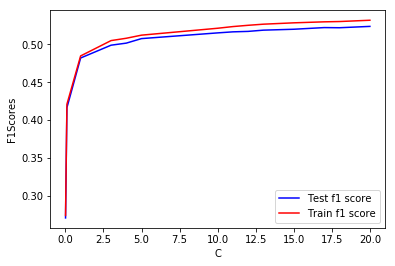

In [63]:
#Plotting C vs f1 scores
plt.plot(list(parameters.get("C")),fscore_test, color = "blue", label="Test f1 score")
plt.plot(list(parameters.get("C")),fscore_train,color = "red", label="Train f1 score")
plt.xlabel("C")
plt.ylabel("F1Scores")
plt.legend()
plt.show()

From the plot we can conclude that after 4.5 the performance is stagnated hence can choose 4.5 as C

In [64]:
#Instantiting the optimal logistic classifier
optimal_regressor = LogisticRegression(C=4.5)
optimal_regressor.fit(X_train, y_train)
# Getiing f1 scores
probablity = optimal_regressor.predict_proba(X_test)
y_pred = [1 if x>=0.3 else 0 for x in probablity[:,1]]

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)
lr_w2v_score = f1Score

54.794520547945204


<h3 style="color:red">Score using logistic regression with w2v is ~ 54.8% </h3>

### 2) SVM

### a. SVM using Bow 

In [81]:
# Splitting my data into train and validation data

X_train, X_test, y_train, y_test = train_test_split(bow, data["label"], test_size=0.3, random_state=0)

#Instantiting the SVM Classifier

classifier = SVC(kernel="linear", C=1 ,probability=True)
classifier.fit(X_train, y_train)
# Getiing f1 scores
probablity = classifier.predict_proba(X_test)
y_pred = [1 if x>=0.3 else 0 for x in probablity[:,1]]

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)
svm_bow_score = f1Score

50.390625


<h3 style="color:red">Score using SVM Classifier with bow is ~ 50.4% </h3>

### b. SVM using Tf-idf 

In [82]:
# Splitting my data into train and validation data

X_train, X_test, y_train, y_test = train_test_split(tfidf, data["label"], test_size=0.3, random_state=0)

#Instantiting the SVM Classifier

classifier = SVC(kernel="linear", C=1 ,probability=True)
classifier.fit(X_train, y_train)
# Getiing f1 scores
probablity = classifier.predict_proba(X_test)
y_pred = [1 if x>=0.3 else 0 for x in probablity[:,1]]

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)
svm_tfidf_score = f1Score

53.20388349514565


<h3 style="color:red">Score using SVM Classifier with tf-idf is ~ 53.3% </h3>

### c. SVM using Word2Vec 

In [83]:
# Splitting my data into train and validation data

X_train, X_test, y_train, y_test = train_test_split(w2v, data["label"], test_size=0.3, random_state=0)

#Instantiting the SVM Classifier

classifier = SVC(kernel="linear", C=1 ,probability=True)
classifier.fit(X_train, y_train)
# Getiing f1 scores
probablity = classifier.predict_proba(X_test)
y_pred = [1 if x>=0.3 else 0 for x in probablity[:,1]]

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)
svm_w2v_score = f1Score

54.5129579982127


<h3 style="color:red">Score using SVM Classifier with w2v is ~ 54.5% </h3>

## 3) Random Forest 

### a. RF using bow 

In [86]:
# Splitting my data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(bow, data["label"], test_size=0.3, random_state=0)

#Instantiting the  randonforest classifier
classifier = RandomForestClassifier(n_estimators=400,random_state=11)
classifier.fit(X_train, y_train)

# Getiing f1 scores
y_pred = classifier.predict(X_test)

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)

rf_bow_score = f1Score


54.516640253565775


<h3 style="color:red">Score using RF Classifier with bow is ~ 54.5% </h3>

### b. RF using Tf-idf 

In [88]:
# Splitting my data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(tfidf, data["label"], test_size=0.3, random_state=0)

#Instantiting the  randonforest classifier
classifier = RandomForestClassifier(n_estimators=400,random_state=11)
classifier.fit(X_train, y_train)

# Getiing f1 scores
y_pred = classifier.predict(X_test)

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)

rf_tfidf_score = f1Score

56.864654333008765


<h3 style="color:red">Score using RF Classifier with tf-idf is ~ 56.9% </h3>

### c. RF using w2v

In [90]:
# Splitting my data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(w2v, data["label"], test_size=0.3, random_state=0)

#Instantiting the  randonforest classifier
classifier = RandomForestClassifier(n_estimators=400,random_state=11)
classifier.fit(X_train, y_train)

# Getiing f1 scores
y_pred = classifier.predict(X_test)

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)

rf_w2v_score = f1Score


57.52032520325204


<h3 style="color:red">Score using RF Classifier with w2v is ~ 57.6% </h3>

## 4) XGBoost 

### a. XGB using bow 

In [91]:
# Splitting my data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(bow, data["label"], test_size=0.3, random_state=0)

""" Instantiting the  xgboost classifier """
classifier = xgb(n_estimators=2000, max_depth=6)
classifier.fit(X_train, y_train)

# Getiing f1 scores
y_pred = classifier.predict(X_test)

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)

xgb_bow_score = f1Score

55.40275049115914


<h3 style="color:red">Score using XGB Classifier with tf-idf is ~ 55.4% </h3>

### b. XGB usingTf-Idf

In [94]:
# Splitting my data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(tfidf, data["label"], test_size=0.3, random_state=0)

""" Instantiting the  xgboost classifier """
classifier = xgb(n_estimators=2000, max_depth=6)
classifier.fit(X_train, y_train)

# Getiing f1 scores
y_pred = classifier.predict(X_test)

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)

xgb_tfidf_score = f1Score

55.46875


<h3 style="color:red">Score using XGB Classifier with tf-idf is ~ 55.5% </h3>

In [95]:
# Splitting my data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(w2v, data["label"], test_size=0.3, random_state=0)

""" Instantiting the  xgboost classifier """
classifier = xgb(n_estimators=2000, max_depth=6)
classifier.fit(X_train, y_train)

# Getiing f1 scores
y_pred = classifier.predict(X_test)

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)

xgb_w2v_score = f1Score

59.76789168278531


<h3 style="color:red">Score using XGB Classifier with w2v is ~ 59.8% </h3>

In [108]:
# Creating a table for comparing the scores of ecag model with different features
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "BOW", "TF-Idf", "W2V"]

x.add_row(["Logistic", lr_bow_score*100, lr_tfidf_score*100, lr_w2v_score*100])
x.add_row(["SVM", svm_bow_score*100, svm_tfidf_score*100, svm_w2v_score*100])
x.add_row(["RF", rf_bow_score*100, rf_tfidf_score*100, rf_w2v_score*100])
x.add_row(["XGB", xgb_bow_score*100, xgb_tfidf_score*100, xgb_w2v_score*100])


print(x)

+----------+--------------------+--------------------+--------------------+
|  Model   |        BOW         |       TF-Idf       |        W2V         |
+----------+--------------------+--------------------+--------------------+
| Logistic | 54.530874097834804 | 56.439704675963895 | 54.794520547945204 |
|   SVM    |  54.5129579982127  | 53.203883495145654 |  54.5129579982127  |
|    RF    | 54.516640253565775 | 56.864654333008765 | 57.52032520325204  |
|   XGB    | 55.40275049115914  |      55.46875      | 59.76789168278531  |
+----------+--------------------+--------------------+--------------------+


<h3 style="color:blue">From above table we can conclude that &nbsp; <b>" XGB + W2V "</b> &nbsp;  is the model to goto with.</h3>

## 6] Model Fine Tuning of best Model i.e XGBoost using w2v

In [110]:
import xgboost as xgb

# Splitting my data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(w2v, data["label"], test_size=0.3, random_state=0)

dtrain = xgb.DMatrix(X_train, label=y_train) 
dvalid = xgb.DMatrix(X_test, label=y_test)

In [111]:
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }


#We will prepare a custom evaluation metric to calculate F1 score.
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]



In [112]:
#Tuning max_depth and min_child_weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]

max_f1 = 0. # initializing with 0 
best_params = None 

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(params, dtrain, feval= custom_eval, num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    
    boost_rounds = cv_results['test-f1_score-mean'].argmax()    
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

#Updating max_depth and min_child_weight parameters.
params['max_depth'] = best_params[0] 
params['min_child_weight'] = best_params[0]

CV with max_depth=6, min_child_weight=5
	F1 Score 0.610142 for 32 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.622234 for 48 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.616346 for 40 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6243768000000001 for 40 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6170714 for 56 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.6192021999999999 for 53 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.6259804 for 63 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6217578 for 70 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.619173 for 37 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.632277 for 59 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6194822 for 38 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.620771 for 30 rounds
Best params: 9, 5, F1 Score: 0.632277


In [113]:
#Tuning subsample and colsample

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 

for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))



#Updating subsample and colsample_bytree
params['subsample'] = best_params[0] 
params['colsample_bytree'] = best_params[1]


CV with subsample=0.5, colsample=0.5
	F1 Score 0.5934864000000001 for 32 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.5934864000000001 for 32 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.5934864000000001 for 32 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.5934864000000001 for 32 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.5934864000000001 for 32 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.5983182 for 17 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.5983182 for 17 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.5983182 for 17 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.5983182 for 17 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.5983182 for 17 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.615614 for 43 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.615614 for 43 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.615614 for 43 rounds
CV with subsample=0.7, colsample=0.

In [114]:
#Tuning learning rate i.e "eta"
max_f1 = 0. 
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

params['eta'] = best_params

CV with eta=0.3
	F1 Score 0.6231479999999999 for 94 rounds
CV with eta=0.2
	F1 Score 0.6291304 for 93 rounds
CV with eta=0.1
	F1 Score 0.6304694 for 95 rounds
CV with eta=0.05
	F1 Score 0.6162064 for 76 rounds
CV with eta=0.01
	F1 Score 0.1340152 for 0 rounds
CV with eta=0.005
	F1 Score 0.1340152 for 0 rounds
Best params: 0.1, F1 Score: 0.6304694


In [3]:
#Let’s have a look at the final list of tuned parameters.
params = {
    'objective':'binary:logistic',
    'max_depth':8,
    'min_child_weight': 6,
    'eta':0.1,
    'subsample': 1,
    'colsample_bytree': 0.5,
    'colsample': 0.9
 }


In [117]:
#Finally we can now use these tuned parameters in our xgboost model.Early stopping of 10 which means if the
#model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

# WAY 1 to Train final model using Learning API:
final_xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )


[0]	Validation-error:0.059235	Validation-f1_score:0.124218
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.053707	Validation-f1_score:0.124218
[2]	Validation-error:0.053603	Validation-f1_score:0.124218
[3]	Validation-error:0.054125	Validation-f1_score:0.124218
[4]	Validation-error:0.052977	Validation-f1_score:0.124218
[5]	Validation-error:0.051622	Validation-f1_score:0.386389
[6]	Validation-error:0.051413	Validation-f1_score:0.445854
[7]	Validation-error:0.0511	Validation-f1_score:0.47561
[8]	Validation-error:0.050266	Validation-f1_score:0.503646
[9]	Validation-error:0.051413	Validation-f1_score:0.524806
[10]	Validation-error:0.0511	Validation-f1_score:0.53625
[11]	Validation-error:0.050579	Validation-f1_score:0.552307
[12]	Validation-error:0.05037	Validation-f1_score:0.548366
[13]	Validation-error:0.050266	Validation-f1_score:0.554645
[14]	Validatio

In [120]:
# WAY 2 to Train final model using ScikitLearn API:
X_train, X_test, y_train, y_test = train_test_split(w2v, data["label"], test_size=0.3, random_state=0)
params["learning_rate"] = params.pop('eta') 
final_xgb = xgb.XGBClassifier(**params,n_estimators=1000)
final_xgb.fit(X_train,y_train)
# Getiing f1 scores
y_pred = final_xgb.predict(X_test)

f1Score = f1_score(y_test, y_pred)
print(f1Score*100)

60.91081593927894


#### Conclusion 

The Best Score obtained using XGBoost+w2v after parameter tuning is  &nbsp; <b style="color:red">  ~ 61%</b>

## 7] Summary

1. After trying out various model using bow, tf-idf, w2v the observation was Word2Vec features turned out to be most useful. Whereas XGBoost with Word2Vec features was the best model for this problem.


2. Hence xgboost + w2v was choosen for further hyperparameter tuning and for creating final Sentiment Analysis Model.


3. But is there anything we can try further to improve the performance. Ofcourse yes theres plenty of room for improvement.
    a. Parts-of-Speech tagging can be used to create new features
    b. Using bi-grams or tri-grams (tokens of 2 or 3 words respectively) for Bag-of-Words and TF-IDF also can improve the
    performance drastically.
    c. Pretrained word-embeddings models can be tried like Google News Corpus.